In [187]:
import pandas as pd
df=pd.read_csv('bike_details.csv')
df.head(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [188]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [189]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [190]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [191]:
df.head(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [192]:
df.fillna(df.ex_showroom_price.mean(),inplace=True)
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,87958.714058
1,Honda Dio,45000,2017,Individual,1st owner,5650,87958.714058
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.000000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.000000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,87958.714058
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.000000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.000000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.000000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.000000


In [193]:
df.ex_showroom_price.round(2)

0        87958.71
1        87958.71
2       148114.00
3        89643.00
4        87958.71
          ...    
1056     52000.00
1057     51000.00
1058     57000.00
1059     58000.00
1060     75000.00
Name: ex_showroom_price, Length: 1061, dtype: float64

In [194]:
df.owner.unique()  #identifying how much owners are in the dataframe

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [195]:
#pd.get_dummies(df['owner'])
#encoding the owner column
di = {'1st owner':1, '2nd owner':2, '3rd owner':3, '4th owner':4}
di

{'1st owner': 1, '2nd owner': 2, '3rd owner': 3, '4th owner': 4}

In [196]:
df['owner'].replace(di, inplace=True)

In [197]:
df['owner'].unique()

array([1, 2, 3, 4], dtype=int64)

In [198]:
#encoding the seller_type
dj = {'Individual': 0, 'Dealer': 1}
df['seller_type'].replace(dj, inplace = True)

In [199]:
df['seller_type'].unique()

array([0, 1], dtype=int64)

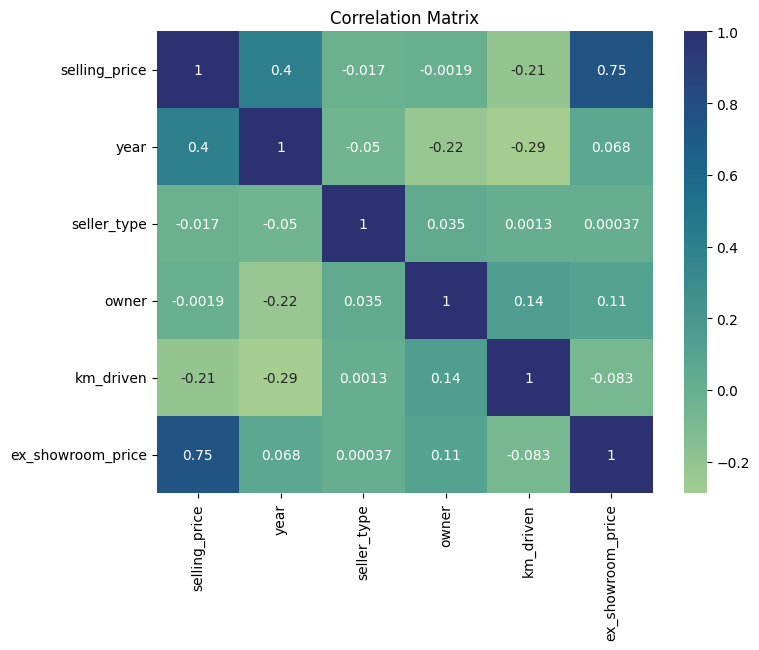

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame without modifying the original DataFrame
df_new = df.drop(columns=['name'])

# Visualize the correlation matrix of the new DataFrame
corr = df_new.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='crest')
plt.title('Correlation Matrix')
plt.show()


In [202]:
x = df.drop(columns=['name','selling_price']).values
y = df['selling_price'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [203]:
len(X_train)

848

In [204]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [205]:
len(y_train)

848

In [206]:
len(X_test)

213

In [207]:
model = lr.fit(X_train,y_train)

In [208]:
pred = lr.predict(X_test)
pred

array([ 2.35297336e+04,  2.57507280e+05,  5.63053253e+04,  7.25222327e+04,
        1.03789342e+05,  3.34861935e+04,  6.05821090e+04,  1.42906595e+04,
        6.49396965e+04,  1.26806764e+04,  2.10464740e+04,  6.40548390e+04,
        6.77519447e+04,  4.52288651e+04,  5.44207978e+04,  4.44123168e+04,
        7.41553565e+04,  4.34405348e+04,  3.88523613e+04,  7.42169308e+04,
        6.21326932e+04,  2.35297336e+04,  1.15912506e+05,  4.91406994e+04,
        3.33406235e+04,  6.31154317e+04,  8.40256596e+04,  3.39208636e+04,
        1.33195987e+05,  9.91555095e+02,  1.52679163e+05,  6.70862559e+04,
        5.58876269e+04,  2.84036257e+04,  8.42339024e+04,  4.83062540e+04,
        7.44681907e+04,  5.76341800e+04,  7.48271077e+04,  3.31313362e+04,
        4.92805708e+04,  7.39458184e+04,  4.30113108e+04,  3.41649814e+04,
        5.65895276e+04,  1.13776668e+05,  2.24322967e+04,  5.23961594e+04,
        7.39236023e+04,  8.42271849e+04,  6.93199882e+04,  7.85195195e+04,
        2.08034706e+04,  

In [209]:
score = lr.score(X_test,y_test)
score

0.8230259111343254

<Axes: >

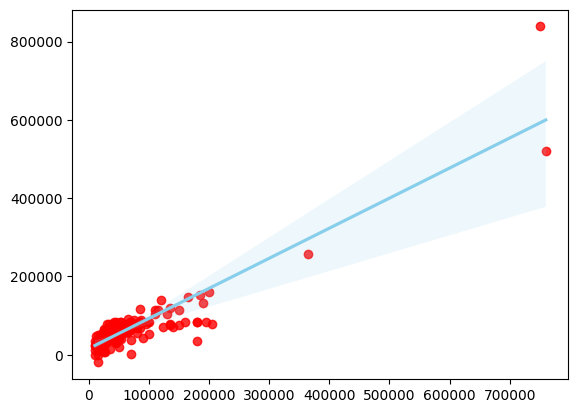

In [211]:
sns.regplot(x=y_test, y=pred,data=df, scatter_kws={"color": "red"}, line_kws={"color": "skyblue"})